# Everything you need to know about fMRI, as a programmer

This notebook is a quick summary of what fMRI measures, how its data is structured, and how you can use it for machine learning models. 

## The Basics

### So, what the heck is fMRI?

When neurons fire (and thus consume energy), the body reacts by sending blood to that area (formally called a hemodynamic response). **F**unctional **m**agnetic **r**esonance **i**maging (fMRI) non-invasively measures brain activity by measuring this blood flow.

This process is founded upon complicated (although fascinating) physics that extend beyond the scope of this introduction, but in short, fMRI is built upon the fact that oxygenated blood and deoxygenated blood have different magnetic properties. The MRI scanner creates a strong magnetic field around the area to be scanned, and what fMRI is technically detecting is changes in the magnetic field due to these differences in oxygen levels. Ipso facto, the signal measured in fMRI is a measure of the change in oxygenation levels of the blood (formally called the blood oxygenation level dependent, or BOLD signal), which in turn represents brain activity.

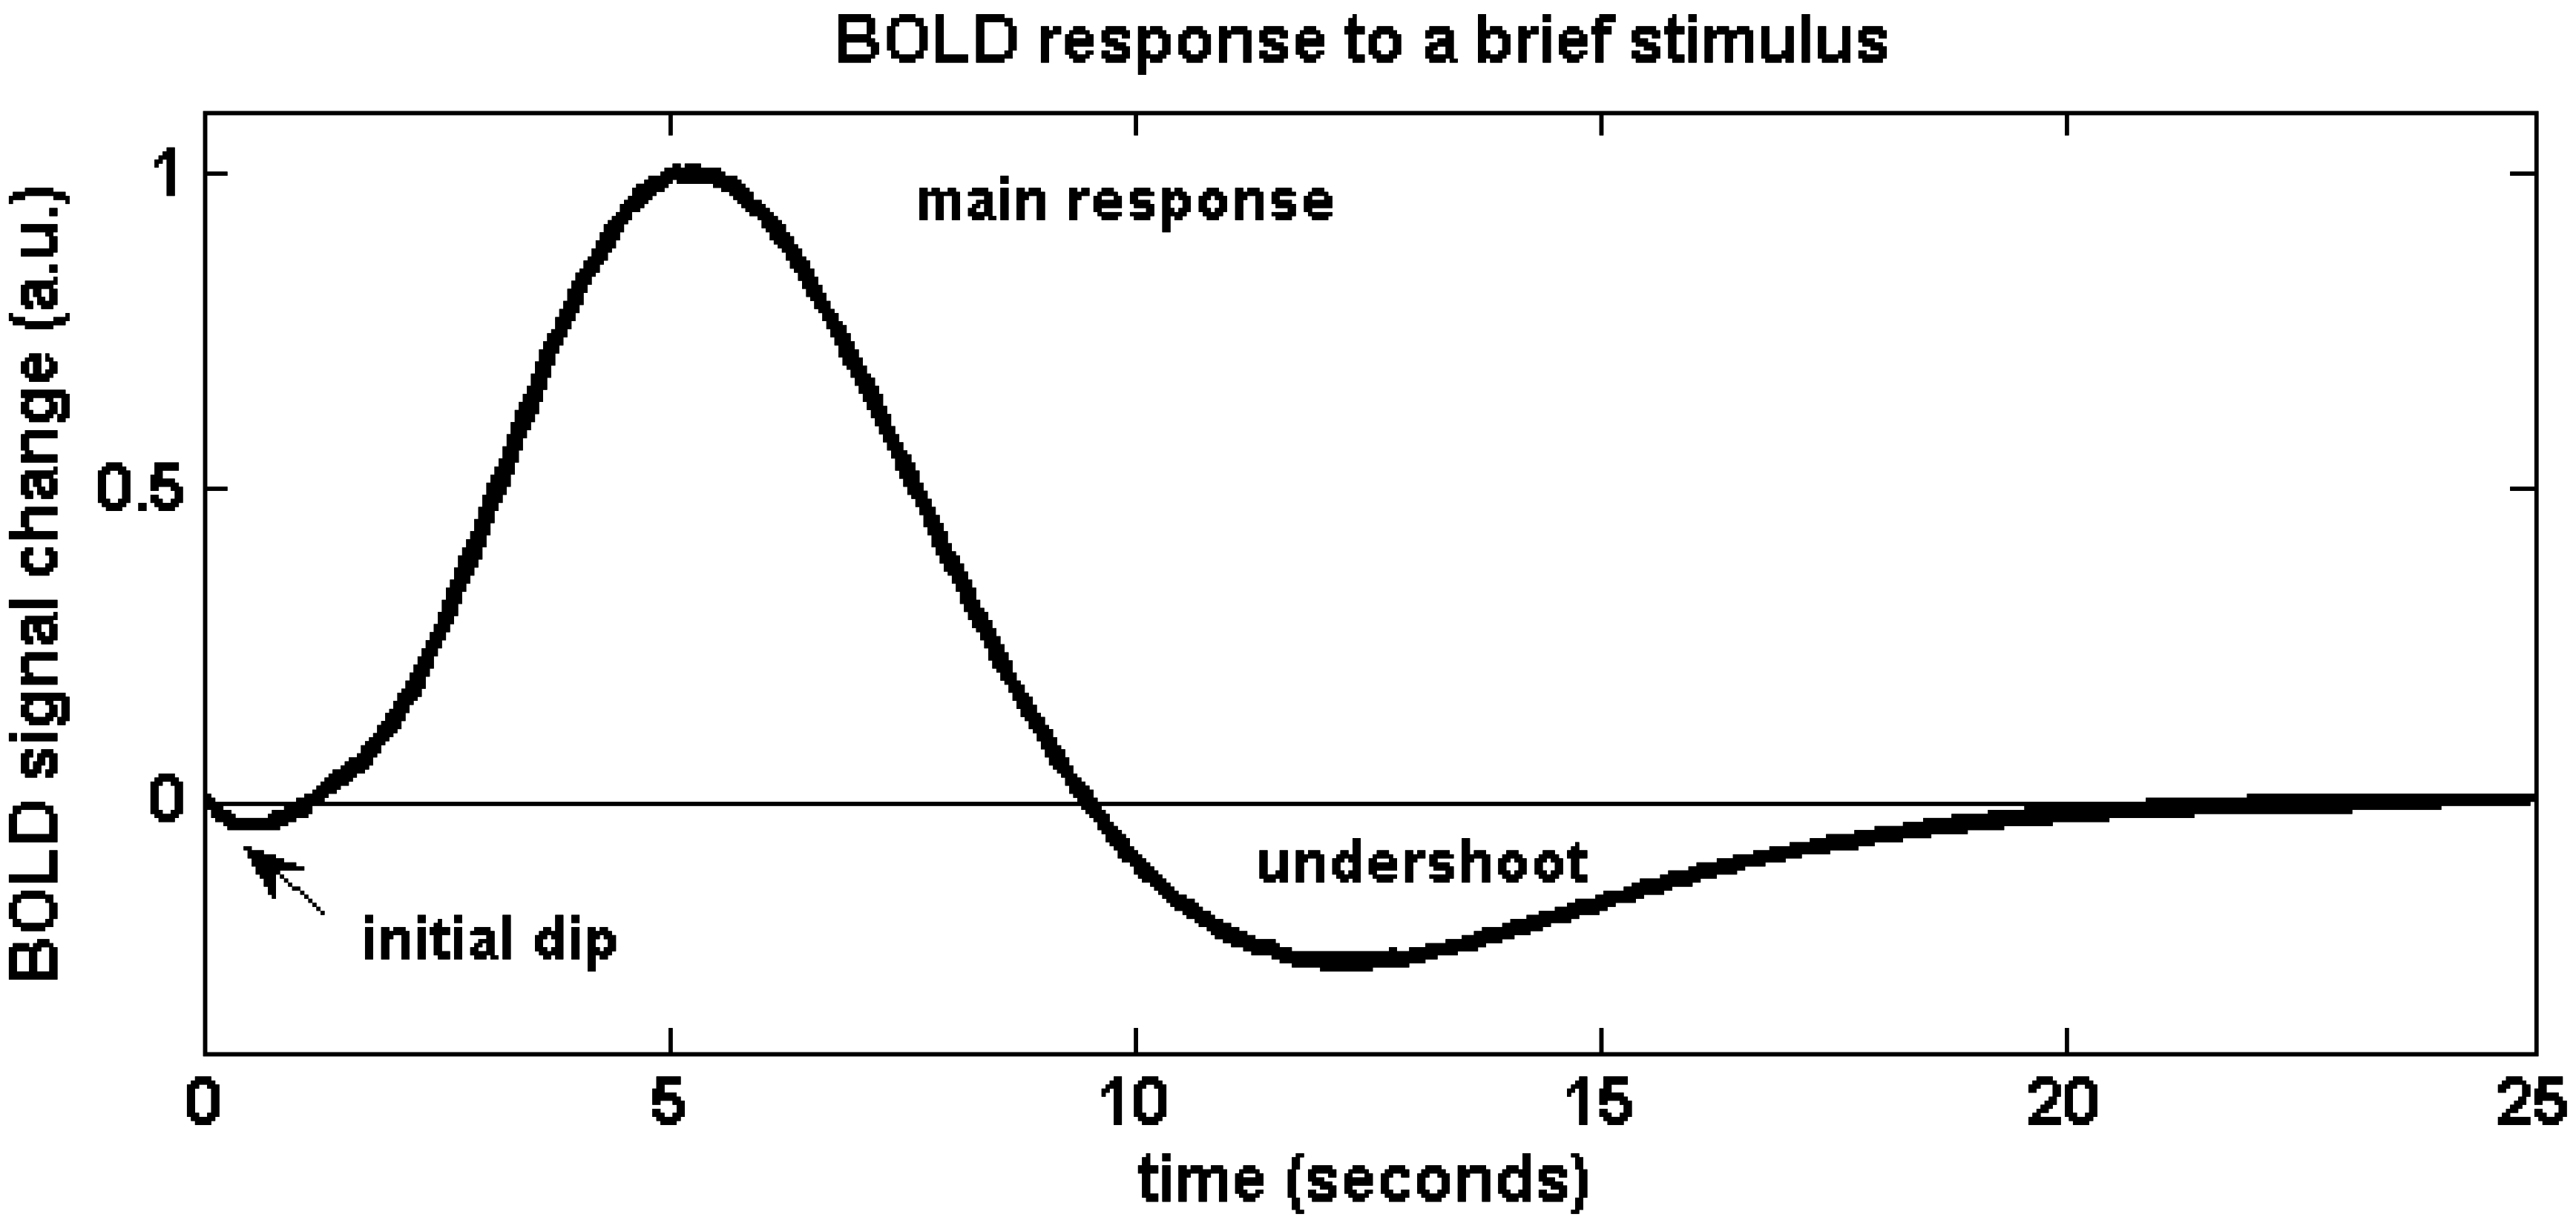

**Figure 1. A typical BOLD signal**. Note that initially, there is a short dip in blood oxygenation due to the neurons' consumption. Then, there is the peak of oxygenation (where the body actually sends more oxygen than was consumed), followed by an undershoot, before returning to baseline levels. It is interesting that the details of the hemodynamic response are still note fully understood today.

image from: https://www.mdpi.com/1996-1944/4/11/1941/htm

### Okay then, so what does the data look like?

Well, brain data is stored as *volume data*, because it is a measure of a 3D volume. A brain scan (often called a brain "image") contains many *voxels*, which are the 3D equivalent of a pixel. The dimensions of a voxel make up the voxel's size (for example, 1mm x 1mm x 1mm). A voxel contains a value which represents the blood oxygenation level of that volume. The collection of data for a single image of the brain at a given point in time is called a *volume*. Please note that brain images are in 3D, but these images are usually stored in a time-series (in order to record neural activity changes across time), so the data is actually 4D. 

[![Screen-Shot-2019-08-16-at-12-20-34-PM.png](https://i.postimg.cc/7LfPpqwL/Screen-Shot-2019-08-16-at-12-20-34-PM.png)](https://postimg.cc/Z9zhNt9k)

The brain is scanned in *slices* and are set in a standard coordinate space, as shown above.

source: handbook of functional mri <br>

Generally, the quality of an image is determined by the following:

- **resolution**: This includes voxel size, the number of slices and their thickness.
- **repetition time** (TR): The time needed to record one brain volume. Given that slices are acquired sequentially, a brain volume is technically not a true representation of an entire brain at a single point in time. For example, there is a delay in time between the 3rd and 4th slice. So, the shorter the repetition time, the shorter the delay and so the truer the representation is to the brain.
- **acquisition** time (TA): The time needed to scan one slice (TA = TR-number of slices).
- field of view (FOV): The dimensions of a slice (ex: 256mm x 256mm).

Raw data is commonly collected in the standardized DICOM image format. From there, this data must be converted, usually into the NIfTI format, in order to be analyzed. 

There are two components to iamge data:

- **image**: The actual data of the brain, represented by a 3D matrix that contains an activation value for each voxel.
- **header**: Information like voxel size, number of measured time points, etc.

After fMRI data is acquired, it goes through rigorous preprocessing steps in order to render the data in a useful form. 

For example, Most researchers now blur each volume spatially, principally to reduce noise, hopefully without significantly affecting the activation signal. 
https://cfn.upenn.edu/stslab/wiki/lib/exe/fetch.php/fmri_club:preprocess1:smith_2004_brjrad.pdf
This tutorial uses a data set that is already preprocessed, and so the details of preprocessing are beyond the scope of this introduction, but hopefully, I'll be able to add that in the near future.

***

There are different types of fMRI data:

- **Event-related** design: The subject is presented with short bursts of stimuli. 
- **Block** design: The subject is presented longer bursts of stimuli.
- **Resting-state** design: The subject is scanned in the absense of stimuli.

***

Sources:
https://miykael.github.io/nipype-beginner-s-guide/neuroimaging.html <br>
handbook of functional mri
https://canlabweb.colorado.edu/files/fMRIChapter.pdf

## Analysis

statistical analysis is carried out to determine which voxels are activated by the stimulation. This can be simple correlation analysis or more advanced modelling of the expected haemodynamic response to the stimulation. Various possible statistical corrections can be included, such as correction for smoothness of the measured time series at each voxel. The main output from this step is a statistical map, which indicates those points in the image where the brain has activated in response to the stimulus.

It is most common to analyse each voxel’s time series independently (‘‘univariate analysis’’). For example, stan- dard GLM analysis is univariate (although cluster-based thresholding, commonly used at the final inference stage, does use spatial neighbourhood information and is there- fore not univariate).


https://cfn.upenn.edu/stslab/wiki/lib/exe/fetch.php/fmri_club:preprocess1:smith_2004_brjrad.pdf

After this, each volume’s overall intensity level may be adjusted so that all volumes have the same mean intensity – this intensity normalization can help reduce the effect of global changes in intensity over time. 
General linear modelling (more correctly, just ‘‘linear modelling’’) sets up a model (i.e. a general pattern which you expect to see in the data) and fits it to the data.

## Results

## Things to know for this tutorial

## Further reading